In [1]:
#-- Basics Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os 
from sklearn.preprocessing import MinMaxScaler


#-- Metrics Calculation
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_percentage_error as MAPE


#-- Warnings OFF
from warnings import simplefilter

%matplotlib inline

# Loading data

In [2]:
all_results_camargos_narmax_escalar = pd.read_csv(f'../Results/NARMAX/Camargos/Escalar/Samples/all_results.csv')
all_results_camargos_narmax_vetorial = pd.read_csv(f'../Results/NARMAX/Camargos/Vetorial/Samples/all_results.csv')
all_results_furnas_narmax_escalar = pd.read_csv(f'../Results/NARMAX/Furnas/Escalar/Samples/all_results.csv')
all_results_furnas_narmax_vetorial = pd.read_csv(f'../Results/NARMAX/Furnas/Vetorial/Samples/all_results.csv')

all_results_camargos_etuni_escalar = pd.read_csv(f'../Results/E-TUNI/Camargos/Escalar/Samples/all_results.csv')
all_results_camargos_etuni_vetorial = pd.read_csv(f'../Results/E-TUNI/Camargos/Vetorial/Samples/all_results.csv')
all_results_furnas_etuni_escalar = pd.read_csv(f'../Results/E-TUNI/Furnas/Escalar/Samples/all_results_escalar.csv')
all_results_furnas_etuni_vetorial = pd.read_csv(f'../Results/E-TUNI/Furnas/Vetorial/Samples/all_results.csv')


In [3]:
all_results_camargos_etuni_vetorial

,sample,tipo,MSE,MAE,MAPE,R2
0,0.0,Treino,2605.539700,32.816691,0.254493,0.629034
1,0.0,Validation,255.356355,14.258426,0.181801,0.923441
2,0.0,Teste,3054.771219,37.171894,0.306410,0.557636
3,1.0,Treino,2605.539700,32.816691,0.254493,0.629034
4,1.0,Validation,255.356355,14.258426,0.181801,0.923441
...,...,...,...,...,...,...
295,98.0,Validation,255.356355,14.258426,0.181801,0.923441
296,98.0,Teste,3054.771219,37.171894,0.306410,0.557636
297,99.0,Treino,2605.539700,32.816691,0.254493,0.629034
298,99.0,Validation,255.356355,14.258426,0.181801,0.923441


In [ ]:
# all_results_camargos_narmax_vetorial ARRUMADO
# all_results_furnas_narmax_vetorial ARRUMADO
# all_results_camargos_etuni_vetorial ERRADO

In [17]:
all_results_furnas_etuni_vetorial.groupby('tipo').agg({
    'MSE':['mean', 'std', 'min', 'max', 'median'],
    'MAE':['mean', 'std', 'min', 'max', 'median'],
    'MAPE':['mean', 'std', 'min', 'max', 'median'],
    'R2':['mean', 'std', 'min', 'max', 'median']
}).T

tipo                 Teste         Treino     Validation
MSE  mean    177225.636403  110651.959578   92780.834737
     std      12657.427844    4607.925370   10364.184290
     min     150583.957129   97949.959134   69805.643935
     max     213628.536549  124369.697088  122536.051035
     median  176210.978083  110537.694941   93284.254929
MAE  mean       281.547350     221.510156     210.692253
     std         13.003137       4.537071      12.125670
     min        251.462158     208.989822     178.947594
     max        310.955301     235.308178     252.036370
     median     280.657455     221.549041     210.315041
MAPE mean         0.338390       0.253123       0.304337
     std          0.026825       0.007172       0.020467
     min          0.281946       0.233510       0.256096
     max          0.412768       0.271134       0.373850
     median       0.335046       0.252711       0.303985
R2   mean         0.526454       0.712340       0.575843
     std          0.033821       0.011979       0.047381
     min          0.429185       0.676678       0.439814
     max          0.597640       0.745361       0.680876
     median       0.529165       0.712637       0.573541

In [3]:
def plot_distribution_metrics(dataset, title_name):
    figure, axes = plt.subplots(2, 2, figsize=(12,12))
    figure.suptitle(f'Distribuição Métricas - {title_name}', fontsize=12)


    my_palette = {'Treino':'green', 'Validation':'blue', 'Teste':'red'}

    sns.histplot(
        ax=axes[0,0],
        data = dataset,
        x = 'MSE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count')
    axes[0,0].set_xlabel('MSE')
    axes[0,0].set_ylabel('Frequência')

    sns.histplot(
        ax=axes[0,1],
        data = dataset,
        x = 'MAE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count')
    axes[0,1].set_xlabel('MAE')
    axes[0,1].set_ylabel('Frequência')

    sns.histplot(
        ax=axes[1,0],
        data = dataset,
        x = 'MAPE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count')
    axes[1,0].set_xlabel('MAPE')
    axes[1,0].set_ylabel('Frequência')
    axes[1,0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axes[1,0].set_xticks(np.arange(0.0, 1.1, 0.1))


    sns.histplot(
        ax=axes[1,1],
        data = dataset,
        x = 'R2',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count')
    axes[1,1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axes[1,1].set_xticks(np.arange(0.0, 1.1, 0.1))
    axes[1,1].set_xlabel('R2')
    axes[1,1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.savefig(f'../Figure/Results/Distribution Metrics {title_name}.png', dpi=300)


    dataset.groupby('tipo').agg({
        'MSE':['mean', 'std', 'min', 'max', 'median'],
        'MAE':['mean', 'std', 'min', 'max', 'median'],
        'MAPE':['mean', 'std', 'min', 'max', 'median'],
        'R2':['mean', 'std', 'min', 'max', 'median']
    }).T


In [13]:
from scipy import stats



def wilcoxon_rank_models(narmax_results, etuni_results, model_name, metric='R2'):
    # Filter test data for both models
    narmax_test = narmax_results[narmax_results['tipo'] == 'Teste'][metric]
    etuni_test = etuni_results[etuni_results['tipo'] == 'Teste'][metric]

    # Perform Wilcoxon test
    statistic, p_value = stats.wilcoxon(narmax_test, etuni_test)

    print(f"Wilcoxon Signed-Ranks Test Results for {model_name}({metric}):")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")

    # Print median values for comparison
    print(f"\nMedian {metric} values:")
    print(f"NARMAX: {narmax_test.median():.4f}")
    print(f"E-TUNI: {etuni_test.median():.4f}")

    # Interpret results
    alpha = 0.05
    print(f"\nAt {alpha} significance level:")
    if p_value < alpha:
        print("Reject H0: There is a significant difference between the models")
    else:
        print("Failed to reject H0: No significant difference between the models")
    print("\n" + "-"*50 + "\n")



# Escalar

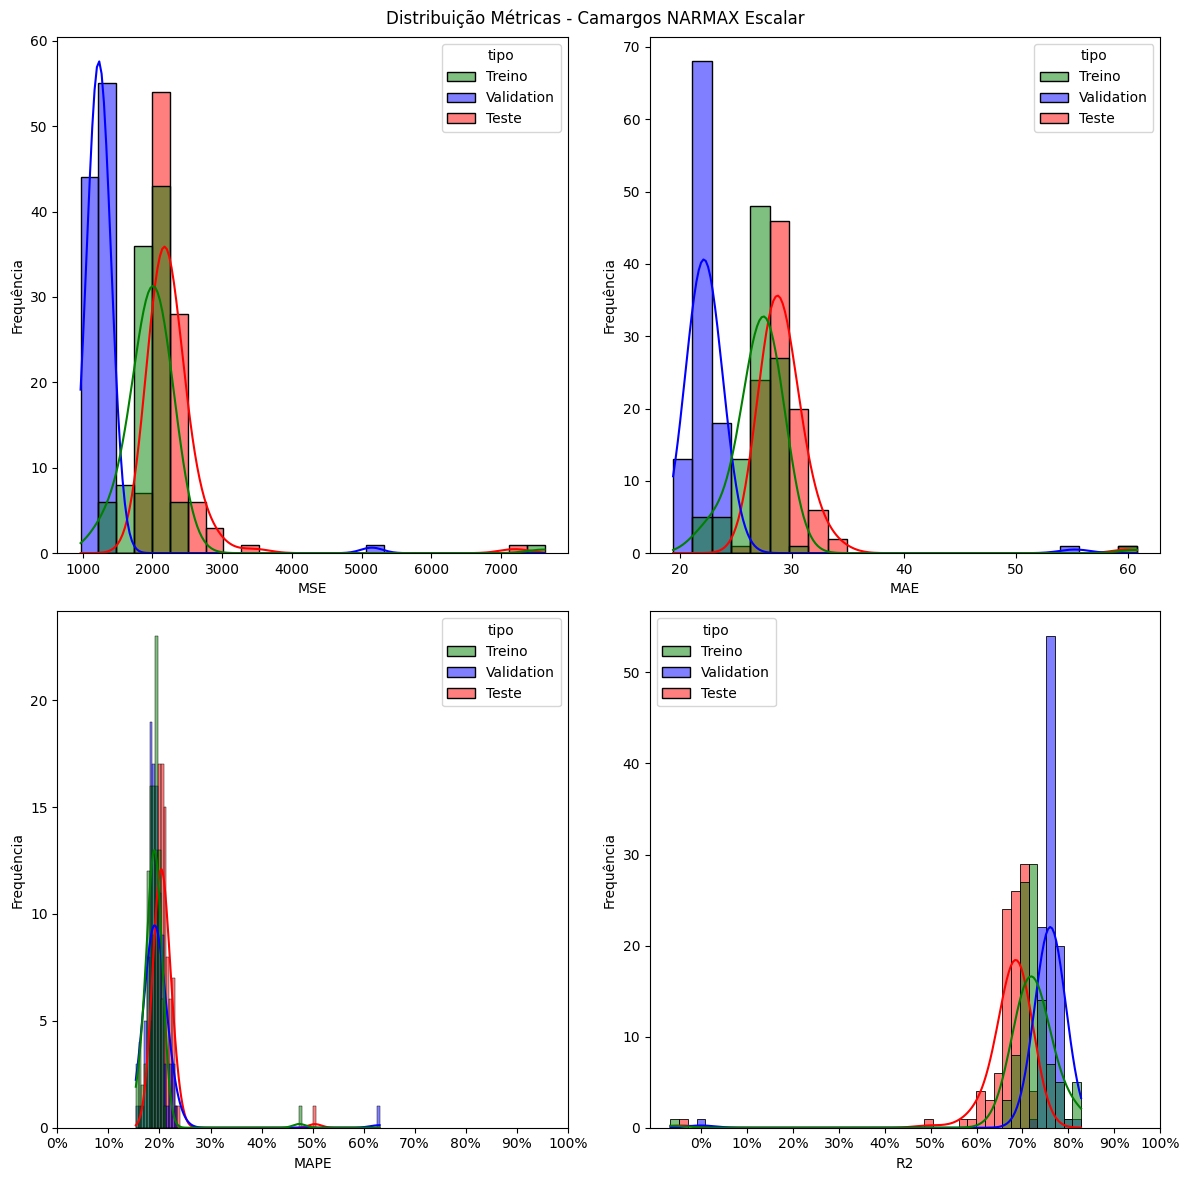

In [14]:
plot_distribution_metrics(all_results_camargos_narmax_escalar, 'Camargos NARMAX Escalar')

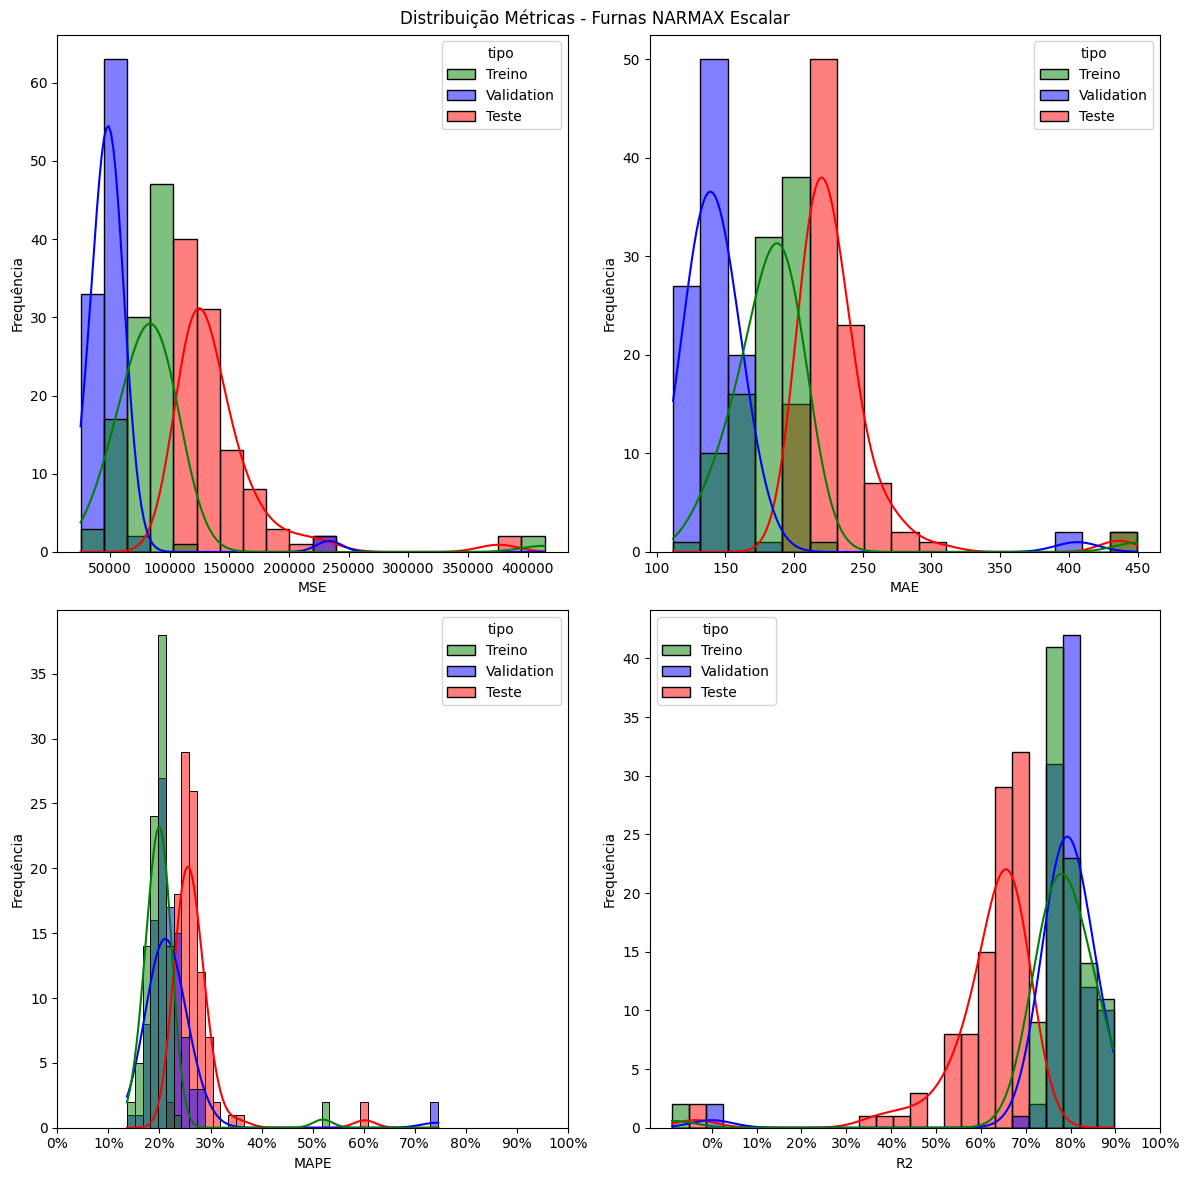

In [15]:
plot_distribution_metrics(all_results_furnas_narmax_escalar, 'Furnas NARMAX Escalar')

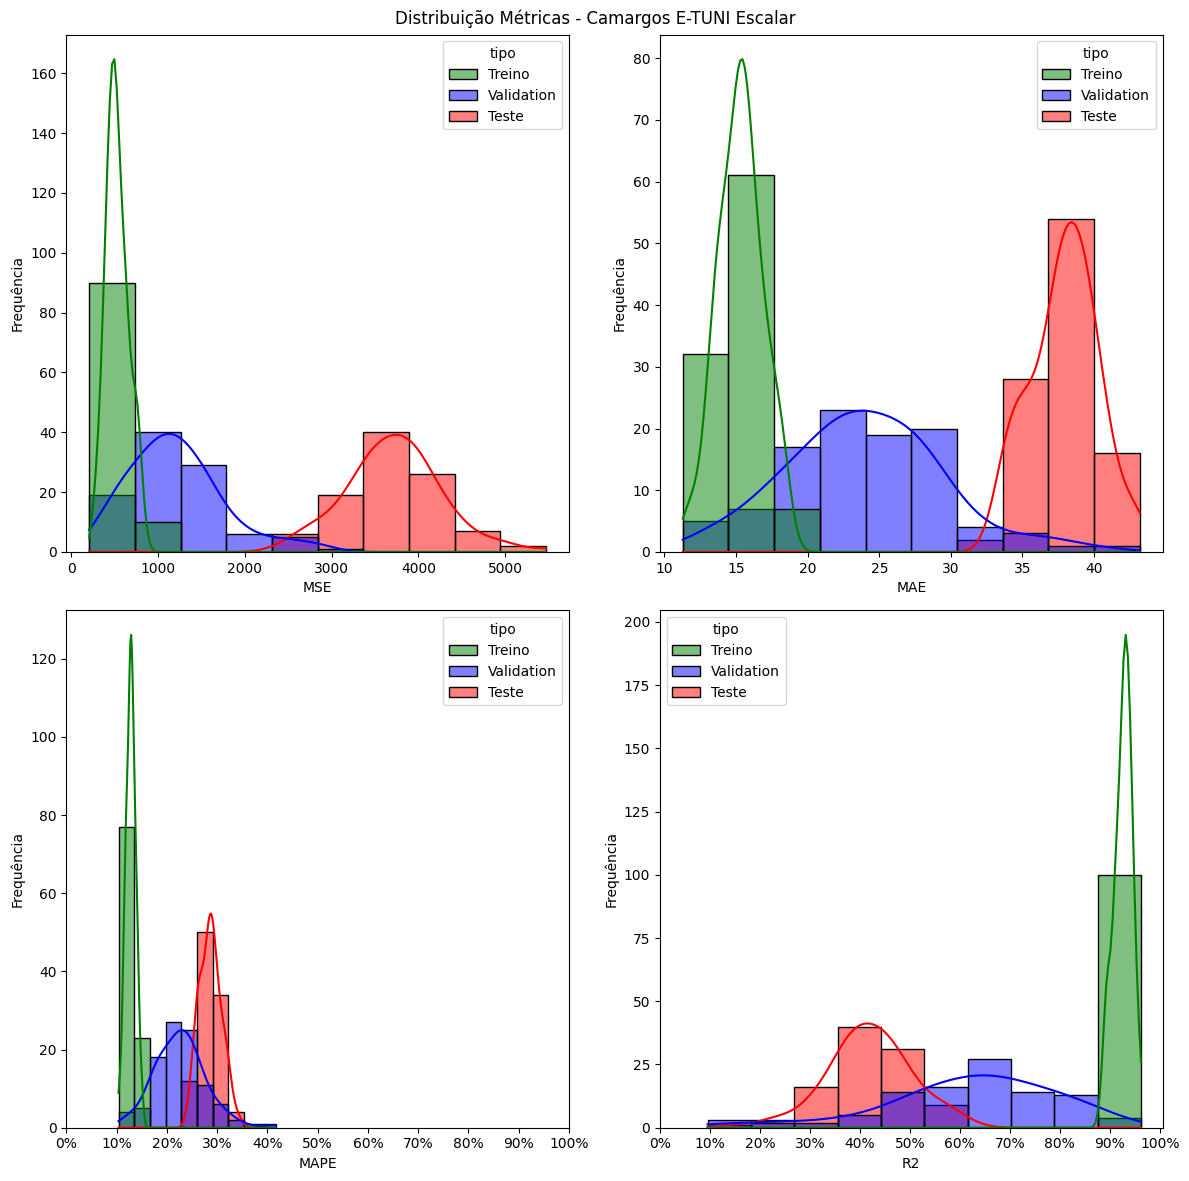

In [16]:
plot_distribution_metrics(all_results_camargos_etuni_escalar, 'Camargos E-TUNI Escalar')

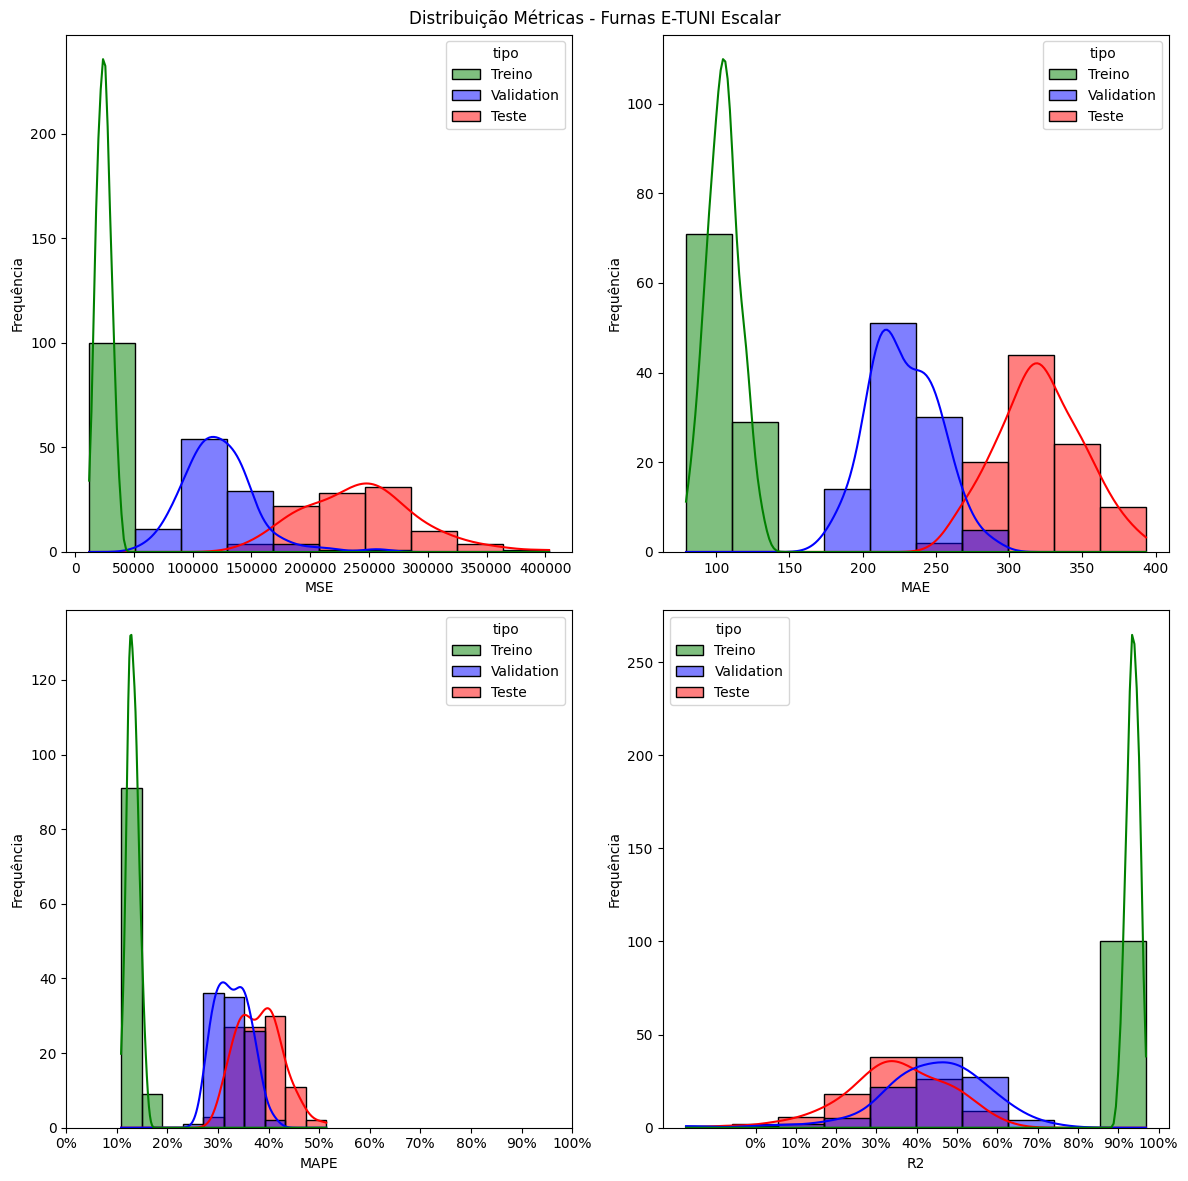

In [17]:
plot_distribution_metrics(all_results_furnas_etuni_escalar, 'Furnas E-TUNI Escalar')

In [18]:

wilcoxon_rank_models(all_results_camargos_narmax_escalar, all_results_camargos_etuni_escalar, "Camargos Escalar", "R2")
wilcoxon_rank_models(all_results_camargos_narmax_escalar, all_results_camargos_etuni_escalar, "Camargos Escalar", "MAE")
# wilcoxon_rank_models(all_results_furnas_narmax_escalar, all_results_furnas_etuni_escalar, "Furnas Escalar")


Wilcoxon Signed-Ranks Test Results for Camargos Escalar(R2):
Statistic: 100.0
p-value: 7.559735353237344e-17

Median R2 values:
NARMAX: 0.6840
E-TUNI: 0.4158

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Escalar(MAE):
Statistic: 101.0
p-value: 7.782675474469018e-17

Median MAE values:
NARMAX: 28.7842
E-TUNI: 38.0793

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------



# Vetorial

In [19]:
all_results_camargos_narmax_vetorial

,sample,tipo,MSE,MAE,MAPE,R2
0,0.0,Treino,2258.358270,30.293606,0.226950,0.678464
1,0.0,Validation,303.909179,12.782103,0.199595,0.908884
2,0.0,Teste,2506.188204,31.725554,0.237678,0.637077
3,1.0,Treino,2258.358270,30.293606,0.226950,0.678464
4,1.0,Validation,303.909179,12.782103,0.199595,0.908884
...,...,...,...,...,...,...
295,98.0,Validation,303.909179,12.782103,0.199595,0.908884
296,98.0,Teste,2506.188204,31.725554,0.237678,0.637077
297,99.0,Treino,2258.358270,30.293606,0.226950,0.678464
298,99.0,Validation,303.909179,12.782103,0.199595,0.908884


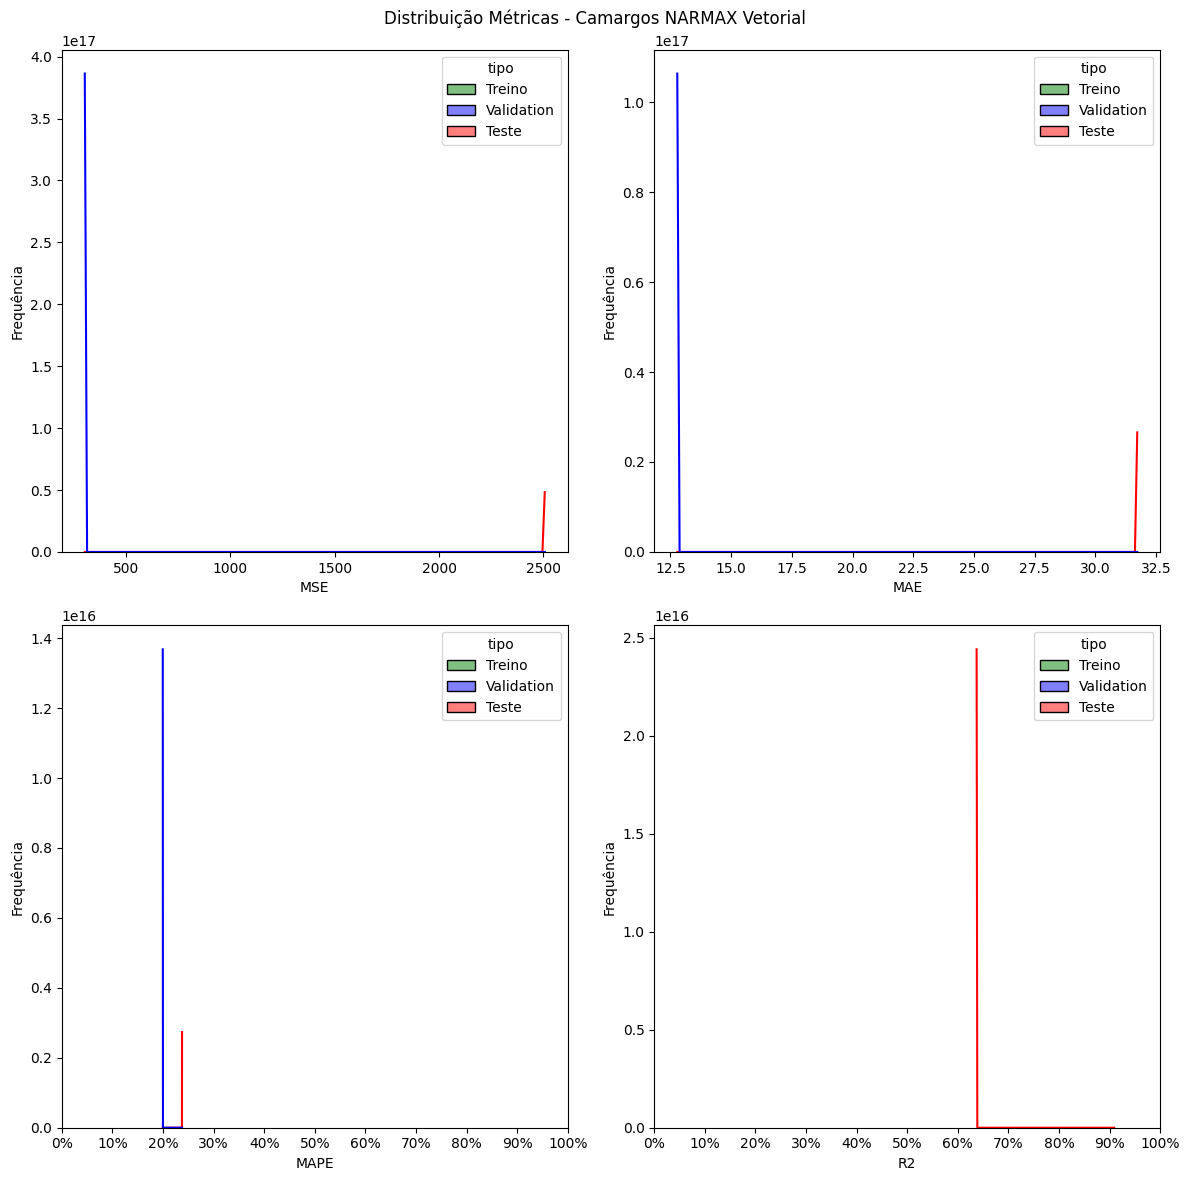

In [20]:
plot_distribution_metrics(all_results_camargos_narmax_vetorial, 'Camargos NARMAX Vetorial')